In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# API details

from config import API_KEY

BASE_URL = "https://api.stlouisfed.org/fred/series/observations"
SERIES_IDS = {
    "Meat, Poultry, Fish, and Eggs": "CUSR0000SAF112",
    "Dairy and Related Products": "CUUR0000SEFJ",
    "Fruits and Vegetables": "CUSR0000SEFV"
}
START_DATE = "2019-12-31"
END_DATE = "2024-12-01"


In [3]:
# Fetch data from FRED API
def fetch_fred_data(series_id):
    params = {
        "series_id": series_id,
        "api_key": API_KEY,
        "file_type": "json",
        "observation_start": START_DATE,
        "observation_end": END_DATE
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()
        # Debugging: Print API response structure
    if "observations" not in data:
        print(f"Error: 'observations' key missing in API response for {series_id}")
        print("Full response:", data)
        return [], []
    
    dates = [obs["date"] for obs in data["observations"]]
    values = [float(obs["value"]) for obs in data["observations"]]
    return dates, values


In [4]:
# Create DataFrame
data = {}
dates = None
for category, series_id in SERIES_IDS.items():
    date_list, value_list = fetch_fred_data(series_id)
    if not date_list:
        continue 
    if dates is None:
        dates = date_list
    data[category] = value_list
if dates is None:
    print("No valid data retrieved from API. Exiting script.")
else:
    df = pd.DataFrame(data, index=pd.to_datetime(dates))


In [5]:
    # Calculate inflation rates as percentage change
    inflation_rates = df.pct_change() * 100


In [6]:
# Calculate yearly inflation rates
yearly_inflation = df.resample('YE').ffill().pct_change() * 100

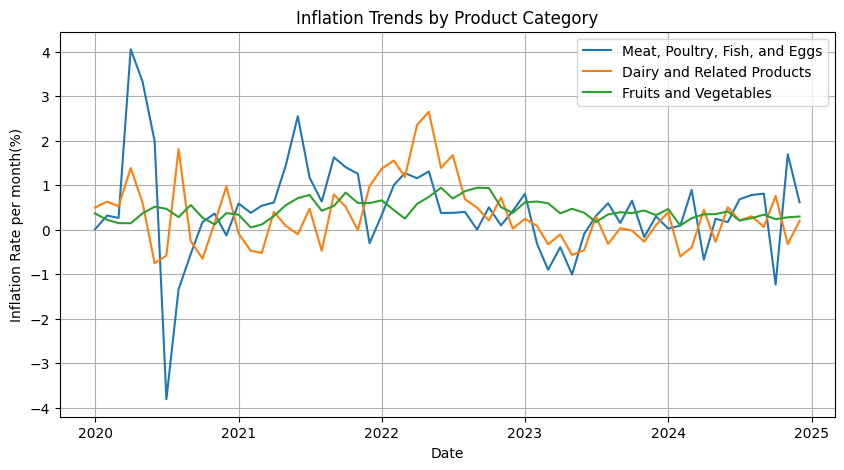

In [7]:
    # Plot inflation trends
    plt.figure(figsize=(10, 5))
    for column in inflation_rates.columns:
        plt.plot(inflation_rates.index, inflation_rates[column], label=column)

    plt.title("Inflation Trends by Product Category")
    plt.xlabel("Date")
    plt.ylabel("Inflation Rate per month(%)")
    plt.legend()
    plt.grid()
    plt.show()


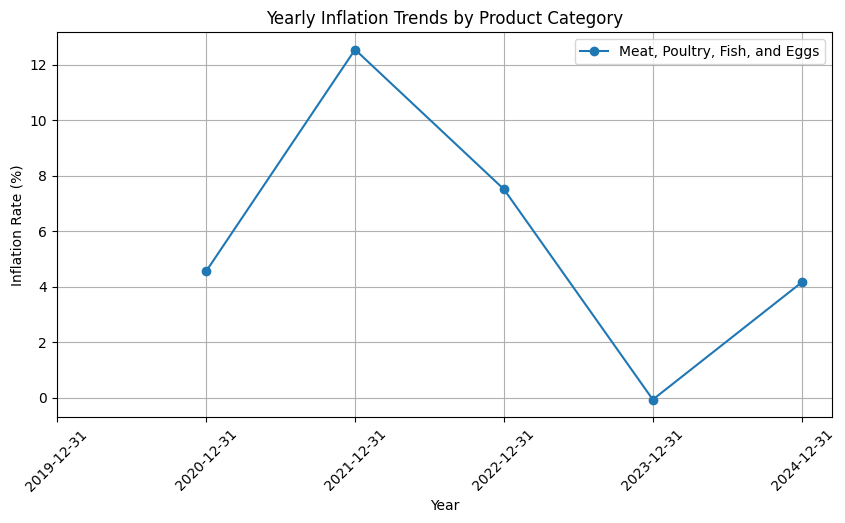

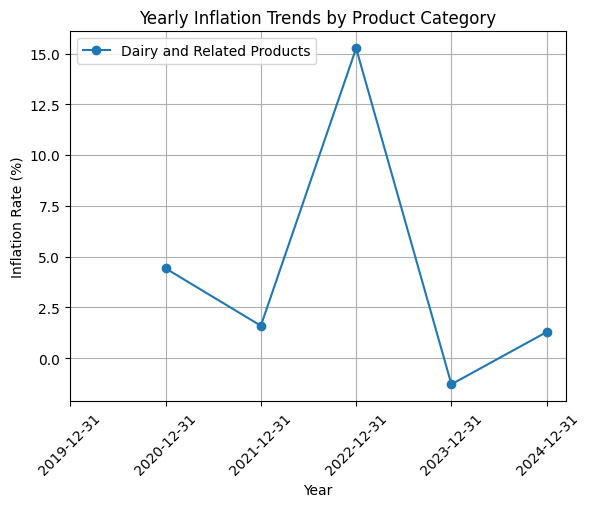

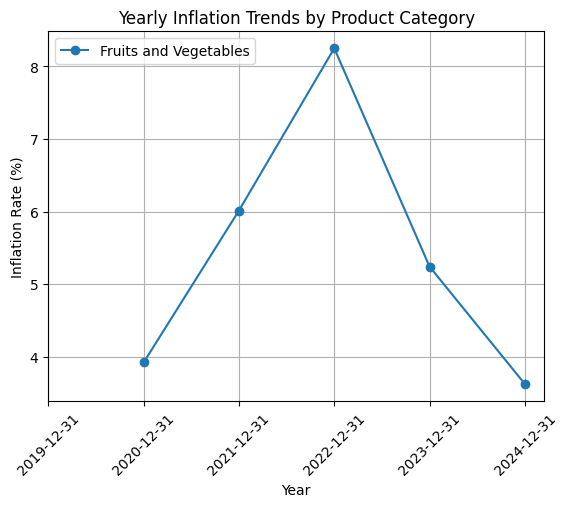

In [8]:
plt.figure(figsize=(10, 5))  
for column in yearly_inflation.columns:
    plt.plot(yearly_inflation.index, yearly_inflation[column], marker='o', label=column)

    plt.title("Yearly Inflation Trends by Product Category")
    plt.xlabel("Year")
    plt.ylabel("Inflation Rate (%)")
    plt.legend()
    plt.grid() 
    plt.xticks(yearly_inflation.index, rotation=45)
    plt.show()


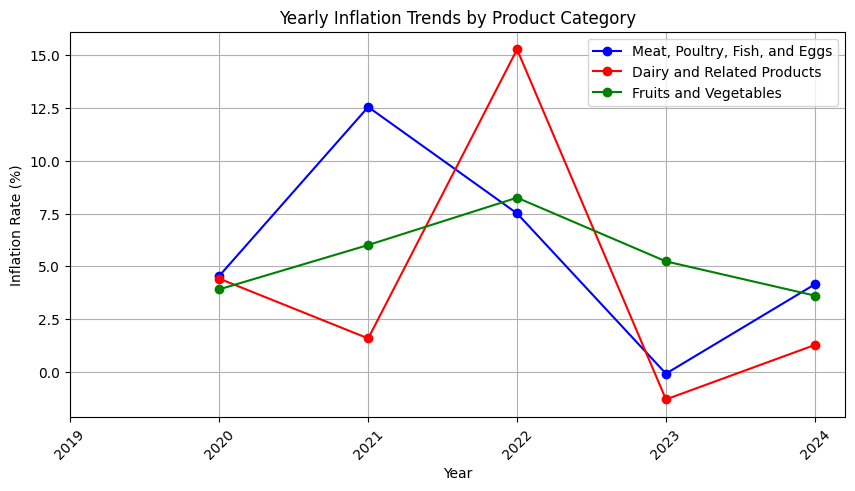

In [21]:
import matplotlib.pyplot as plt

# Define custom colors for each category
colors = {
    'Meat, Poultry, Fish, and Eggs': 'blue',
    'Dairy and Related Products': 'red',
    'Fruits and Vegetables': 'green'
}

plt.figure(figsize=(10, 5))

# Apply the specified colors
for column in yearly_inflation.columns:
    plt.plot(
        yearly_inflation.index,
        yearly_inflation[column],
        marker='o',
        label=column,
        color=colors.get(column, 'black')
    )

plt.title("Yearly Inflation Trends by Product Category")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid()

plt.xticks(yearly_inflation.index, yearly_inflation.index.year, rotation=45)

plt.show()

Standard Deviation of Yearly Inflation Rates:
Meat, Poultry, Fish, and Eggs    4.662514
Dairy and Related Products       6.475055
Fruits and Vegetables            1.864129
dtype: float64


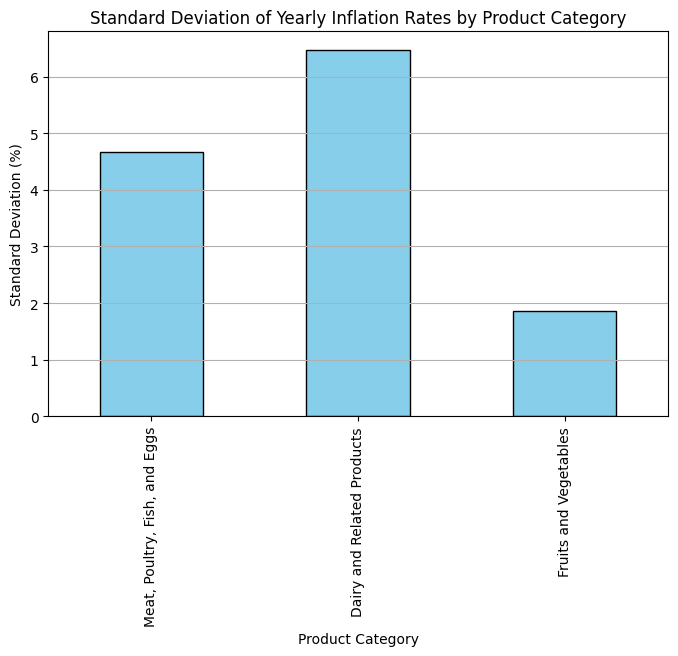

In [11]:
std_dev_inflation = yearly_inflation.std()

print("Standard Deviation of Yearly Inflation Rates:")
print(std_dev_inflation)

plt.figure(figsize=(8, 5))
std_dev_inflation.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Standard Deviation of Yearly Inflation Rates by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Standard Deviation (%)")
plt.grid(axis='y')

plt.show()

<Figure size 1000x600 with 0 Axes>

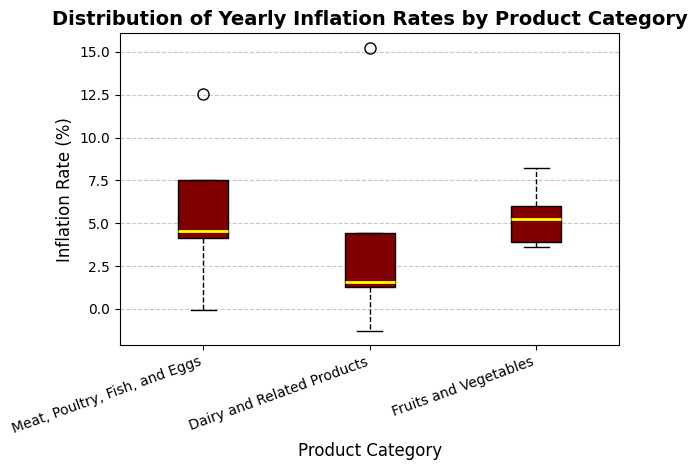

In [13]:
plt.figure(figsize=(10, 6))


yearly_inflation.plot(kind='box', 
                      vert=True, 
                      patch_artist=True,
                      boxprops=dict(facecolor='maroon', color='black'),
                      medianprops=dict(color='yellow', linewidth=2),
                      whiskerprops=dict(color='black', linestyle='--'),
                      capprops=dict(color='black'),
                      flierprops=dict(marker='o', color='orange', markersize=8, linestyle='none'))

plt.title("Distribution of Yearly Inflation Rates by Product Category", fontsize=14, weight='bold')
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Inflation Rate (%)", fontsize=12)

plt.xticks(rotation=20, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [14]:
    # Identify highest and lowest inflation groups
    average_inflation = inflation_rates.mean().sort_values(ascending=False)
    print("Average Inflation Rate Per Month:")
    print(average_inflation)

    highest_inflation_group = average_inflation.idxmax()
    lowest_inflation_group = average_inflation.idxmin()

    print(f"\nGroup with Highest Inflation: {highest_inflation_group}")
    print(f"Group with Least Inflation: {lowest_inflation_group}")


Average Inflation Rate Per Month:
Meat, Poultry, Fish, and Eggs    0.465727
Fruits and Vegetables            0.439106
Dairy and Related Products       0.338407
dtype: float64

Group with Highest Inflation: Meat, Poultry, Fish, and Eggs
Group with Least Inflation: Dairy and Related Products


In [15]:
 # Identify highest and lowest average yearly inflation groups
average_yearly_inflation = yearly_inflation.mean().sort_values(ascending=False)
print("\nAverage Yearly Inflation Rates:")
print(average_yearly_inflation)

highest_yearly_inflation_group = average_yearly_inflation.idxmax()
lowest_yearly_inflation_group = average_yearly_inflation.idxmin()

print(f"\nGroup with Highest Yearly Inflation: {highest_yearly_inflation_group}")
print(f"Group with Least Yearly Inflation: {lowest_yearly_inflation_group}")



Average Yearly Inflation Rates:
Meat, Poultry, Fish, and Eggs    5.740759
Fruits and Vegetables            5.408524
Dairy and Related Products       4.258596
dtype: float64

Group with Highest Yearly Inflation: Meat, Poultry, Fish, and Eggs
Group with Least Yearly Inflation: Dairy and Related Products
